In [1]:
import warnings

import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.initializers import HeNormal

warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split=0.25, 
                                                                seed=0)

In [3]:
print("Train - Independent features\n", X_train[:2])
print("Train - Target feature:", y_train[:2])
print("\nTest - Independent features\n", X_test[:2])
print("Test - Target feature:", y_test[:2])

Train - Independent features
 [[6.7240e-02 0.0000e+00 3.2400e+00 0.0000e+00 4.6000e-01 6.3330e+00
  1.7200e+01 5.2146e+00 4.0000e+00 4.3000e+02 1.6900e+01 3.7521e+02
  7.3400e+00]
 [9.2323e+00 0.0000e+00 1.8100e+01 0.0000e+00 6.3100e-01 6.2160e+00
  1.0000e+02 1.1691e+00 2.4000e+01 6.6600e+02 2.0200e+01 3.6615e+02
  9.5300e+00]]
Train - Target feature: [22.6 50. ]

Test - Independent features
 [[4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [6.44405e+00 0.00000e+00 1.81000e+01 0.00000e+00 5.84000e-01 6.42500e+00
  7.48000e+01 2.20040e+00 2.40000e+01 6.66000e+02 2.02000e+01 9.79500e+01
  1.20300e+01]]
Test - Target feature: [50.  16.1]


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((379, 13), (379,), (127, 13), (127,))

In [5]:
# Sequential model
model = Sequential()

# Input layer
model.add(Input(shape=(13, )))

# Dense layer
model.add(Dense(units=128, 
                kernel_initializer=HeNormal(seed=0), 
                kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(rate=0.25))

# Output layer
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mape'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 256 (1.00 KB)

In [7]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64,
                    validation_split=0.25)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 594.0417 - mape: 101.7779 - val_loss: 981.9416 - val_mape: 138.7294
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 556.5630 - mape: 100.2548 - val_loss: 716.8513 - val_mape: 111.3364
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 548.0343 - mape: 99.0009 - val_loss: 601.3720 - val_mape: 97.3142
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 537.6984 - mape: 97.0131 - val_loss: 532.7314 - val_mape: 87.9339
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 500.5768 - mape: 95.1117 - val_loss: 487.9247 - val_mape: 81.2659
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 511.7397 - mape: 93.7958 - val_loss: 455.0561 - val_mape: 76.2111
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 512.0356 - mape: 91.9590 - val_loss: 432.2384 - val_mape: 73.0515
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 477.1460 - mape: 90.1639 - val_loss: 416.1847 - val_mape: 71.0932
Epoc

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.6721 - mape: 30.1772 - val_loss: 148.7296 - val_mape: 38.5768
Epoch 53/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 96.9905 - mape: 28.5417 - val_loss: 138.7275 - val_mape: 36.8104
Epoch 54/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 82.3244 - mape: 28.2842 - val_loss: 128.7592 - val_mape: 34.9918
Epoch 55/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 87.0049 - mape: 27.9092 - val_loss: 118.1464 - val_mape: 33.0768
Epoch 56/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 73.2179 - mape: 26.1894 - val_loss: 109.5564 - val_mape: 31.4534
Epoch 57/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 64.2365 - mape: 26.3969 - val_loss: 102.2323 - val_mape: 30.0489
Epoch 58/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.0858 - mape: 25.6236 - val_loss: 96.3678 - val_mape: 28.9648
Epoch 59/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 62.1759 - mape: 24.8653 - val_loss: 92.1709 - val_mape: 28.1324
Epoch 60/100
5/5 ━━━━━━

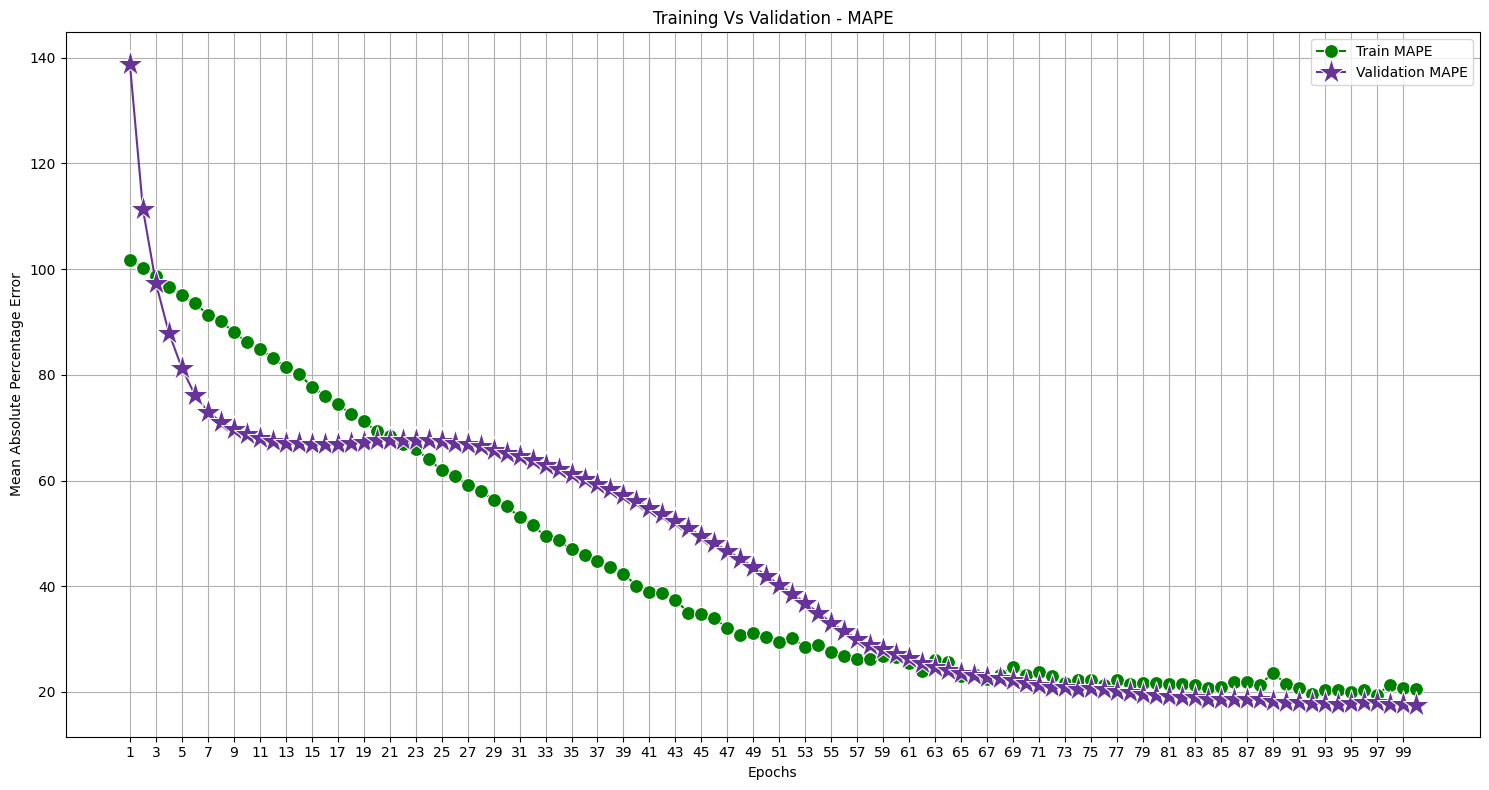

In [8]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=range(1, 101), 
             y=history.history['mape'], 
             label='Train MAPE', 
             color='green', 
             marker='o', 
             markersize=10)
sns.lineplot(x=range(1, 101), 
             y=history.history['val_mape'], 
             label='Validation MAPE', 
             color='rebeccapurple', 
             marker='*', 
             markersize=20)
plt.xticks(range(1, 101, 2))
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Percentage Error")
plt.title("Training Vs Validation - MAPE")
plt.grid()
plt.tight_layout()
plt.show()

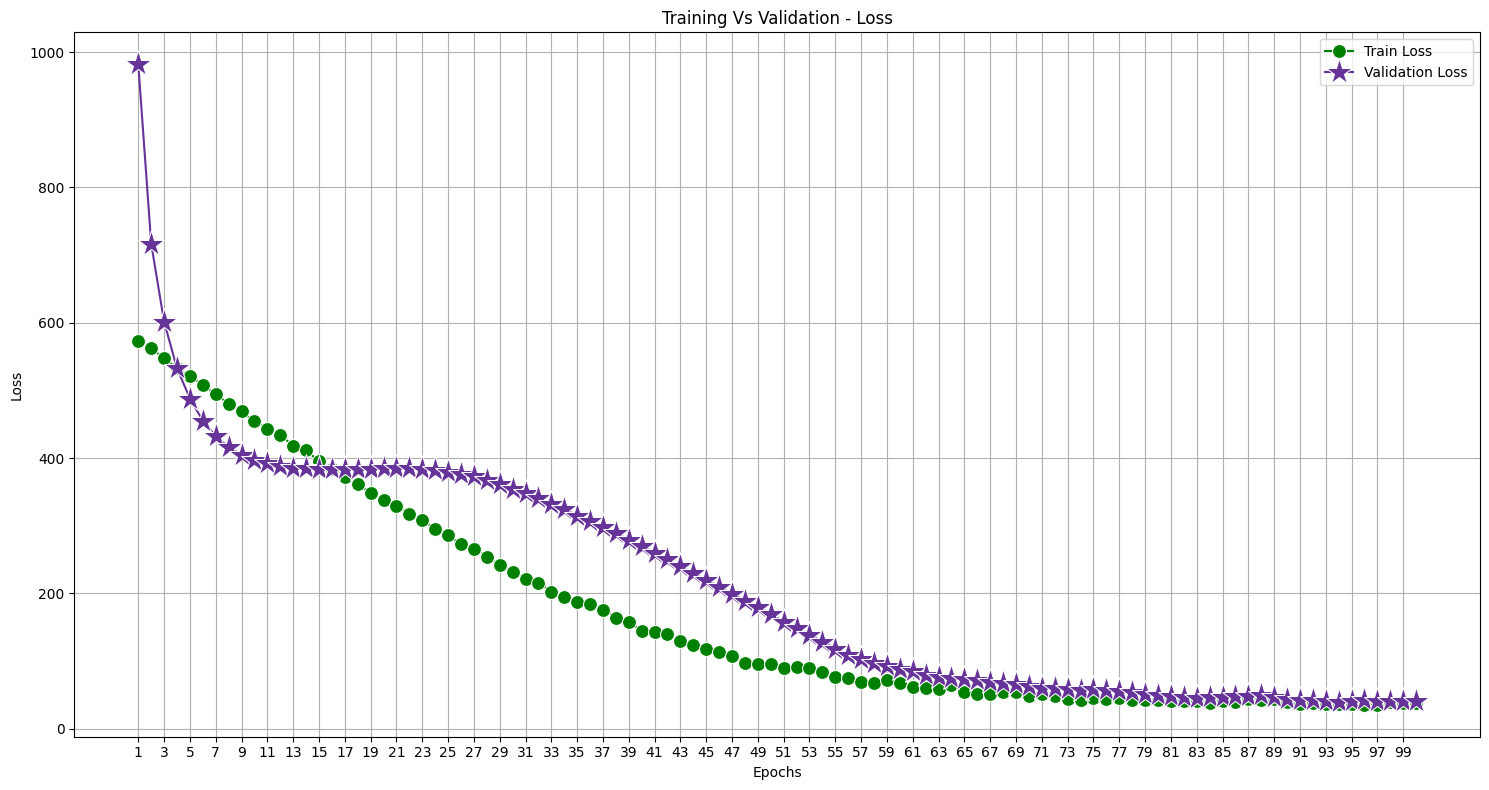

In [9]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=range(1, 101), 
             y=history.history['loss'], 
             label='Train Loss', 
             color='green', 
             marker='o', 
             markersize=10)
sns.lineplot(x=range(1, 101), 
             y=history.history['val_loss'], 
             label='Validation Loss', 
             color='rebeccapurple', 
             marker='*', 
             markersize=20)
plt.xticks(range(1, 101, 2))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Vs Validation - Loss")
plt.grid()
plt.tight_layout()
plt.show()

In [10]:
test_loss, test_mape = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test mean absolute percentage error: ", round(test_mape, 4), "%.", sep='')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68.7852 - mape: 22.1844 
Test loss: 58.642818450927734
Test mean absolute percentage error: 21.5676%.


In [11]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68.7852 - mape: 22.1844 


[58.642818450927734, 21.567642211914062]

In [12]:
y_test_pred = pd.Series(data=np.squeeze(model.predict(X_test)), 
                        name='Price')
y_test_pred.head(2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


0    22.227102
1    13.428834
Name: Price, dtype: float32

In [13]:
y_test_pred.to_csv(path_or_buf='Boston House Price Prediction.csv', 
                   index=False)